# PLOT PSTHs

This code plots the psth for all the different stimuli that I have in the recordings.


output: pdfs


Parameters:
- name of saved file
- neuron to analyse
- factors and controls to play with


In [1]:
%load_ext autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from pylab import *
from scipy import *
import numpy as np
from attrdict import AttrDict

import sys
sys.path.append('.') #this is where we put all the functions.py
from stim_loading import *
from save_load import *
#from exps_files_folders import *


#Expe, stimfiles, timefiles, eptimefiles, M= eff()

ImportError: No module named 'stim_loading'

In [52]:
Folder = '/home/anthony/Documents/Etudes/M1Bio/StageM1/EXP_2/data/'
file = Folder + 'psthdata5672'

PSTH_data = load_obj(file)

def build_stim(rep, isi):
    
    onestim =  np.append(arange(10), np.ones(11)*10, axis=0)
    onestim = np.append(onestim, arange(9,-1,-1), axis=0)
    
    ttot = rep*500
    stim = np.zeros(ttot)
    
    phase = isi*4 # this might have to change depending on which whisker is stimulated
    
    
    for p in 500*arange(rep)[0:-1]+phase:
        stim[p:p+31] = onestim
        
    
    return stim

['exp2_m567s1_c10' 'exp2_m567s1_c18' 'exp2_m567s1_c19' 'exp2_m567s1_c2'
 'exp2_m567s1_c22' 'exp2_m567s1_c3' 'exp2_m567s1_c30' 'exp2_m567s1_c31'
 'exp2_m567s1_c33' 'exp2_m567s1_c34' 'exp2_m567s1_c35' 'exp2_m567s1_c38'
 'exp2_m567s1_c39' 'exp2_m567s1_c4']
dict_keys(['Ctrl1', 'BLANK', 'Ctrl3', 'hist_logic', 'Ctrl4', 'Normal', 'Ctrl2', 'Counts'])
exp2_m567s1_c38


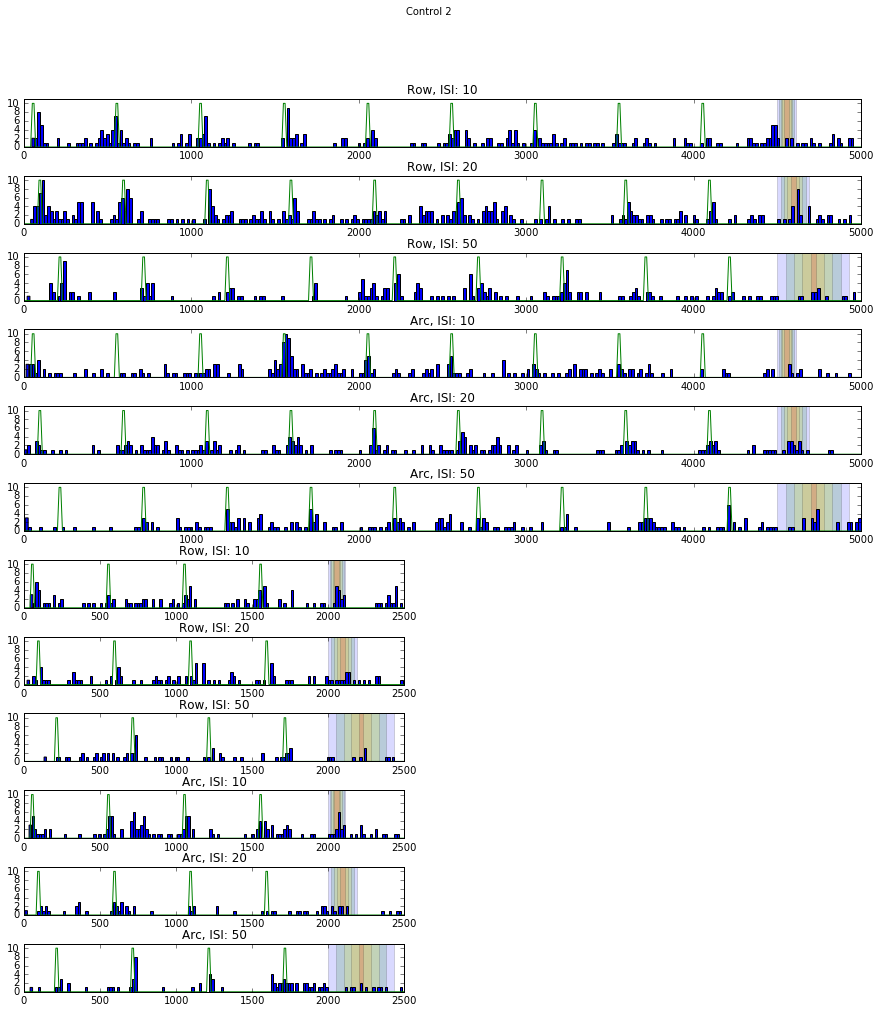

In [27]:
# Plotting REP 10 and 5

idx = sort(list(PSTH_data.keys()))
print(idx)

ps = PSTH_data
n = idx[-3]

print(ps[n].keys())

ps[n].Normal.keys()
print(n)




fig = plt.figure(1, figsize=(15,16))
fig.subplots_adjust(hspace=0.6)



j=-1
rep=10
Ctrl = 'Ctrl2'

if Ctrl == 'Normal':
    fig.suptitle(Ctrl)
elif Ctrl == 'Ctrl1':
    fig.suptitle('Control 1')
elif Ctrl == 'Ctrl2':
    fig.suptitle('Control 2')
elif Ctrl == 'Ctrl3':
    fig.suptitle('Control 3')
elif Ctrl == 'Ctrl4':
    fig.suptitle('Control 4')    
elif Ctrl == 'BLANK':
    fig.suptitle(Ctrl.capitalize())
    

for pad in ['ROW','ARC']:
    j+=1
    i=-1   
    for isi in [10,20,50]:
        i+=1
        ax = plt.subplot2grid((12,2), (i+j*3,0), colspan=2)
        
        phase = isi*4
        rainbow = ['blue', 'green', 'yellow', 'orange', 'red']
        for k in range(5):
            ax.axvspan((arange(rep)*500)[-1] + isi*k, (arange(rep)*500)[-1]  + 2*phase + 30 -isi*k, alpha=0.15, facecolor=rainbow[k])

        n1 = hist(ps[n][Ctrl]['hold'][pad][rep][isi], bins=300)
        stim = build_stim(rep,isi)
        
        ax.plot(stim)
                
        ax.set_title(pad.capitalize() + ',' + ' ISI: ' + str(isi))
        #plt.xlabel('Time (ms)')
        #plt.ylabel('Firing rate')
        ymax = ylim()[1]
        ylim(ymax = ymax*1.1)  
        
j=1
rep=5

for pad in ['ROW','ARC']:
    j+=1
    i=-1   
    for isi in [10,20,50]:
        i+=1
        ax = plt.subplot2grid((12,2), (i+j*3,0))
        
        phase = isi*4
        rainbow = ['blue', 'green', 'yellow', 'orange', 'red']
        for k in range(5):
            ax.axvspan((arange(rep)*500)[-1] + isi*k, (arange(rep)*500)[-1]  + 2*phase + 30 -isi*k, alpha=0.15, facecolor=rainbow[k])

        n1 = hist(ps[n][Ctrl]['hold'][pad][rep][isi], bins=150)
        stim = build_stim(rep,isi)
        
        ax.plot(stim)
                
        ax.set_title(pad.capitalize() + ',' + ' ISI: ' + str(isi))
        #plt.xlabel('Time (ms)')
        #plt.ylabel('Firing rate')
        ymax = ylim()[1]
        ylim(ymax = ymax*1.1)         
        



        



In [59]:
# Plotting REP 10

idx = sort(list(PSTH_data.keys()))
print(idx)

ps = PSTH_data
n = idx[-3]

print(ps[n].keys())

ps[n].Normal.keys()
print(n)




fig = plt.figure(1, figsize=(15,16))
fig.subplots_adjust(hspace=0.6)



j=-1
rep=10
Ctrl = 'Normal'

if Ctrl == 'Normal':
    fig.suptitle(Ctrl)
elif Ctrl == 'Ctrl1':
    fig.suptitle('Control 1')
elif Ctrl == 'Ctrl2':
    fig.suptitle('Control 2')
elif Ctrl == 'Ctrl3':
    fig.suptitle('Control 3')
elif Ctrl == 'Ctrl4':
    fig.suptitle('Control 4')    
elif Ctrl == 'BLANK':
    fig.suptitle(Ctrl.capitalize())
    

for pad in ['ROW','ARC']:
    j+=1
    i=-1   
    for isi in [10,20,50]:
        i+=1
        ax = plt.subplot2grid((6,1), (i+j*3,0), colspan=2)
        
        phase = isi*4
        rainbow = ['blue', 'green', 'yellow', 'orange', 'red']
        for k in range(5):
            ax.axvspan((arange(rep)*500)[-1] + isi*k, (arange(rep)*500)[-1]  + 2*phase + 30 -isi*k, alpha=0.15, facecolor=rainbow[k])

        n1 = hist(ps[n][Ctrl]['hold'][pad][rep][isi], bins=300)
        stim = build_stim(rep,isi)
        
        ax.plot(stim)
                
        ax.set_title(pad.capitalize() + ',' + ' ISI: ' + str(isi))
        #plt.xlabel('Time (ms)')
        #plt.ylabel('Firing rate')
        ymax = ylim()[1]
        ylim(ymax = ymax*1.1)     



        
  
    
plt.show()  


['exp2_m567s1_c10' 'exp2_m567s1_c18' 'exp2_m567s1_c19' 'exp2_m567s1_c2'
 'exp2_m567s1_c22' 'exp2_m567s1_c3' 'exp2_m567s1_c30' 'exp2_m567s1_c31'
 'exp2_m567s1_c33' 'exp2_m567s1_c34' 'exp2_m567s1_c35' 'exp2_m567s1_c38'
 'exp2_m567s1_c39' 'exp2_m567s1_c4']
dict_keys(['BLANK', 'Ctrl3', 'Ctrl2', 'Counts', 'Ctrl4', 'Normal', 'Ctrl1', 'hist_logic'])
exp2_m567s1_c38


In [ ]:
# Plotting REP 5

idx = sort(list(PSTH_data.keys()))
print(idx)

ps = PSTH_data
n = idx[0]

print(ps[n].keys())

ps[n].Normal.keys()






fig = plt.figure(1, figsize=(15,30))
fig.subplots_adjust(hspace=0.7)

if Ctrl == 'Normal':
    fig.suptitle(Ctrl)
elif Ctrl == 'Ctrl1':
    fig.suptitle('Control 1')
elif Ctrl == 'Ctrl2':
    fig.suptitle('Control 2')
elif Ctrl == 'Ctrl3':
    fig.suptitle('Control 3')
elif Ctrl == 'Ctrl4':
    fig.suptitle('Control 4')    
elif Ctrl == 'BLANK':
    fig.suptitle(Ctrl.capitalize())
    
Ctrl = 'Normal'
rep=5
j=-1
for pad in ['ROW','ARC']:
    j+=1
    i=-1   
    for isi in [10,20,50]:
        i+=1
        ax = plt.subplot2grid((6,1), (i+j*3,0))
        
        
        #for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
         #   item.set_fontsize(10)
            
        phase = isi*4
        rainbow = ['blue', 'green', 'yellow', 'orange', 'red']
        for k in range(5):
            ax.axvspan((arange(rep)*500)[-1] + isi*k, (arange(rep)*500)[-1]  + 2*phase + 30 -isi*k, alpha=0.15, facecolor=rainbow[k])

        n1 = hist(ps[n][Ctrl]['hold'][pad][rep][isi], bins=300)
        stim = build_stim(rep,isi)
        
        ax.plot(stim)
                
        ax.set_title(pad.capitalize() + ',' + ' ISI: ' + str(isi))
        #plt.xlabel('Time (ms)')
        #plt.ylabel('Firing rate')
        ymax = ylim()[1]
        ylim(ymax = ymax*1.1) 
        print(n)
plt.show()

['exp2_m567s1_c10' 'exp2_m567s1_c18' 'exp2_m567s1_c19' 'exp2_m567s1_c2'
 'exp2_m567s1_c22' 'exp2_m567s1_c3' 'exp2_m567s1_c30' 'exp2_m567s1_c31'
 'exp2_m567s1_c33' 'exp2_m567s1_c34' 'exp2_m567s1_c35' 'exp2_m567s1_c38'
 'exp2_m567s1_c39' 'exp2_m567s1_c4']
dict_keys(['Ctrl1', 'BLANK', 'Ctrl3', 'hist_logic', 'Ctrl4', 'Normal', 'Ctrl2', 'Counts'])
exp2_m567s1_c38
exp2_m567s1_c38
exp2_m567s1_c38
exp2_m567s1_c38
exp2_m567s1_c38
exp2_m567s1_c38


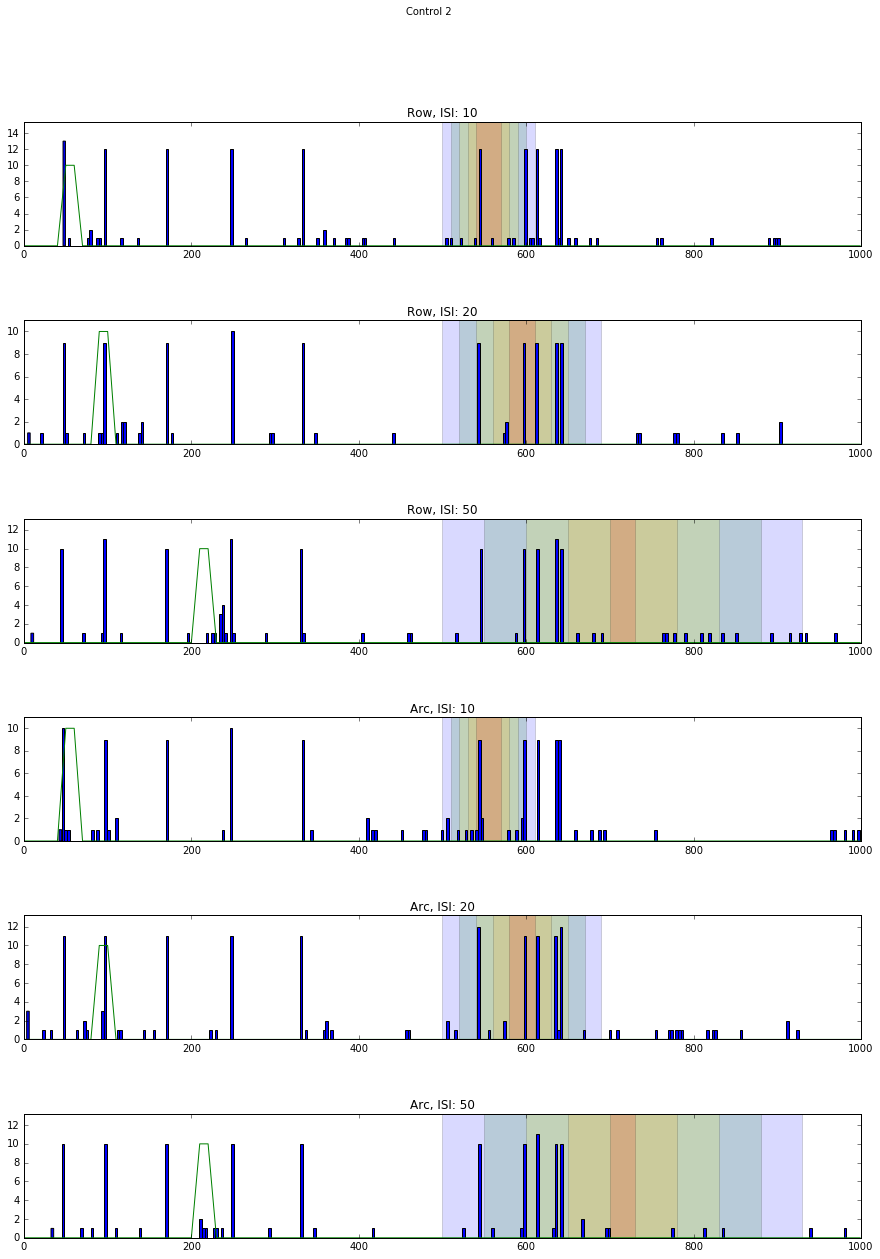

In [28]:
# Plotting REP 2
           
idx = sort(list(PSTH_data.keys()))
print(idx)

ps = PSTH_data
n = idx[-3]

print(ps[n].keys())

ps[n].Normal.keys()






fig = plt.figure(1, figsize=(15,20))
fig.subplots_adjust(hspace=0.6)

if Ctrl == 'Normal':
    fig.suptitle(Ctrl)
elif Ctrl == 'Ctrl1':
    fig.suptitle('Control 1')
elif Ctrl == 'Ctrl2':
    fig.suptitle('Control 2')
elif Ctrl == 'Ctrl3':
    fig.suptitle('Control 3')
elif Ctrl == 'Ctrl4':
    fig.suptitle('Control 4')    
elif Ctrl == 'BLANK':
    fig.suptitle(Ctrl.capitalize())
    

j=-1
rep=2
Ctrl = 'Normal'
for pad in ['ROW','ARC']:
    j+=1
    i=-1   
    for isi in [10,20,50]:
        i+=1
        ax = plt.subplot2grid((6,1), (i+j*3,0))
        
        phase = isi*4
        rainbow = ['blue', 'green', 'yellow', 'orange', 'red']
        for k in range(5):
            ax.axvspan((arange(rep)*500)[-1] + isi*k, (arange(rep)*500)[-1]  + 2*phase + 30 -isi*k, alpha=0.15, facecolor=rainbow[k])

        n1 = hist(ps[n][Ctrl]['hold'][pad][rep][isi], bins=300)
        stim = build_stim(rep,isi)
        
        ax.plot(stim)
                
        ax.set_title(pad.capitalize() + ',' + ' ISI: ' + str(isi))
        ymax = ylim()[1]
        #plt.xlabel('Time (ms)')
        #plt.ylabel('Firing rate')
        ylim(ymax = ymax*1.1)  
        print(n)
plt.show()        

In [ ]:
Folder = '/home/anthony/Documents/Etudes/M1Bio/StageM1/Analysis/Exp_Analysis/'
file = Folder + 'EXP_3_m1_s3'

PSTH_data = load_obj(file)

def build_stim(rep, isi):
    
    onestim =  np.append(arange(10), np.ones(11)*10, axis=0)
    onestim = np.append(onestim, arange(9,-1,-1), axis=0)
    
    ttot = rep*500
    stim = np.zeros(ttot)
    
    phase = isi*4 # this might have to change depending on which whisker is stimulated
    
    
    for p in 500*arange(rep)+phase:
        stim[p:p+31] = onestim
        
    
    return stim




idx = sort(list(PSTH_data.keys()))
print(idx)

ps = PSTH_data
n = idx[0]

print(ps[n].keys())

ps[n].Normal.keys()



Ctrl = 'Normal'


fig = plt.figure(1, figsize=(15,40), dpi=80)
fig.subplots_adjust(hspace=0.6)

if Ctrl == 'Normal':
    fig.suptitle(Ctrl)
elif Ctrl == 'Ctrl1':
    fig.suptitle('Control 1')
elif Ctrl == 'Ctrl2':
    fig.suptitle('Control 2')
elif Ctrl == 'Ctrl3':
    fig.suptitle('Control 3')
elif Ctrl == 'Ctrl4':
    fig.suptitle('Control 4')    
elif Ctrl == 'BLANK':
    fig.suptitle(Ctrl.capitalize())

rep = 10
ax = plt.subplot2grid((1,1), (0,0), colspan=1)
phase = isi*4
rainbow = ['blue', 'green', 'yellow', 'orange', 'red']
ax.axvspan((arange(rep)*500)[-1] + isi*4, 4500 + 2*phase + 30 -isi*4, alpha=0.15, facecolor=rainbow[4])
n1 = hist(ps[n][Ctrl]['hold']['ARC'][rep][10], bins=300)
stim = build_stim(rep,isi)
        
ax.plot(stim)
ax.set_title(pad.capitalize() + ',' + ' ISI: ' + str(isi))
ymax = ylim()[1]
ylim(ymax = ymax*5)  
print(n)
plt.show()

# Plotting for poster

In [3]:
# Plotting of the stimulus

stim =  np.append(arange(10), np.ones(11)*10, axis=0)
stim = np.append(stim, arange(9,-1,-1), axis=0)
stimStr = np.zeros(111)
stimStr[40:71] = stim

stim =  np.append(arange(10), np.ones(31)*10, axis=0)
stim = np.append(stim, arange(9,-1,-1), axis=0)
stim1= np.zeros(111)
stim1[30:81] = stim

stim =  np.append(arange(10), np.ones(51)*10, axis=0)
stim = np.append(stim, arange(9,-1,-1), axis=0)
stim2 = np.zeros(111)
stim2[20:91] = stim

stim =  np.append(arange(10), np.ones(71)*10, axis=0)
stim = np.append(stim, arange(9,-1,-1), axis=0)
stim3 = np.zeros(111)
stim3[10:101] = stim

stim4 =  np.append(arange(10), np.ones(91)*10, axis=0)
stim4 = np.append(stim4, arange(9,-1,-1), axis=0)



plt.figure(1, figsize=(10,10))
plt.title('A sequence of Deflection', fontsize = 20)
plt.xlabel('Time (ms)', fontsize = 16)
plt.ylabel('Amplitude of Deflection (degrees)', fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks([0, 5, 10, 15],['0', '1°', '2°', '3°'], fontsize = 16)
#plt.text(60, .025, r'$\mu=100,\ \sigma=15$')

         
plt.xlim(-5, 115)
plt.ylim(0, 19)

rainbow = ['blue', 'green', 'yellow', 'orange', 'red']
j = -1
for i in [stim4, stim3, stim2, stim1, stimStr]:
    j+=1
    plt.plot(i, color='green')
    plt.axvspan(10*j, 110-10*j, alpha=0.15, facecolor=rainbow[j])
plt.show()


    
#for p in 500*arange(rep)[0:-1]+phase:
#    stim[p:p+31] = onestim


#rainbow = ['blue', 'green', 'yellow', 'orange', 'red']
#    for k in range(5):
#        ax.axvspan((arange(rep)*500)[-1] + isi*k, (arange(rep)*500)[-1]  + 2*phase + 30 -isi*k, alpha=0.15, facecolor=rainbow[k])


In [33]:
len(stim4)

111

In [ ]:
len(stim[11:len(stim3)])

In [ ]:
Folder = '/media/matias/DATA/WORKSPACE2/Expect_git/data/'
file = Folder + 'psthdata5672'

PSTH_data = load_obj(file)

def build_stim(rep, isi):
    
    onestim =  np.append(arange(10),np.ones(10)*10, axis=0)
    onestim = np.append(onestim,arange(9,-1,-1),axis=0)
    
    ttot = rep*500
    stim = np.zeros(ttot)
    
    phase = isi*4
    
    
    
    for p in 500*arange(rep)+phase:
        stim[p:p+30] = onestim
    
    
    return stim




idx = sort(list(PSTH_data.keys()))
print(idx)

ps = PSTH_data
n = idx[-3]

print(ps[n].keys())

ps[n].Normal.keys()

fig = figure(figsize=(20,5))

rep=2
isi=20
pad='ARC'

n1 =hist(ps[n].Ctrl2.hold[pad][rep][isi], bins=100)
stim = build_stim(rep,isi,PW=4)

plot(stim)

print(n)
#xlim(650,850)

a[0:2]# Define and load data files from experiments

In [ ]:
global binname, textname
#---------------------------------------------------------------------------------------
SelExp = [2]                         #select experiment numbers!
grupete = [2]   #select cluster groups! 2 for good clusters 1 for multiunits, 3 for unsorted

#select measurement and/or shanks!
Measurements = m764[0:1]           #['m1s1']#['m3s1','m3s3']#m12[-4:]#['m1s1','m1s2','m1s3','m1s4']   

rootF = '/media/matias/DATA/WORKSPACE2/'    

dirs =[]
#--------------------------------------------------------------------------------
# Loop Experiments
#--------------------------------------------------------------------------------
last_expe=0     #we use this to load stim only when we change experiment
for expe in SelExp:
    
    PSTHall = {}
    PSTHdata = {}
    PSTH_spikes_counts = {}
    
    #Measurements = sorted(Expe[expe])                         #uncommento to select all
    print('Experiment: ', expe)
   
    last_meas =0   #we use this to find when we change measurement to load Vtag and stim again
    
    #--------------------------------------------------------------------------------
    #loop goodunits, multiunits, unsorted...
    for group in grupete:   #2 for good clusters 1 for multiunits 3 for unsorted
        #folder names
        if group ==3:
            dirs  = [rootF + 'OUTPUT/EXP_'+str(expe)]
        if group ==2:
            dirs  = [rootF + 'OUTPUT/EXP_'+str(expe)]
        if group ==1:
            dirs  = [rootF + 'OUTPUT/EXP_'+str(expe)]
        #--------------------------------------------------------------------------------
        #create output folders
        for dir in dirs:
            if not os.path.exists(dir):
                os.makedirs(dir) 
        dire = dirs[0] +'/'
        titles = 'Exp'+ str(expe) + '_Meas_' + meas[1] + '_Shank_' + meas[3]
        #--------------------------------------------------------------------------------
        print('Group:', group)
        #--------------------------------------------------------------------------------
        #loop measurements and shanks
        #Measurements = sorted((Expe[expe]))
        
        for meas in Measurements:           
            print(meas)
            current_meas = int(meas[1])   #measurement number
            #---------------------------------------------------------------
            #This is to account for diffrerent stims when looping diffrerent experiments
            if current_meas!=last_meas:
                stimfile = rootF + 'EXP_' + str(expe) + '/' + stimfiles[expe][current_meas-1]
                timefile = rootF + 'EXP_' + str(expe) + '/' +timefiles[expe][current_meas-1]
                epfile = rootF + 'EXP_' + str(expe) + '/' +eptimefiles[expe][current_meas-1]
                
                Stims = build_dict_stim(stimfile, timefile, epfile)
          
            
            #select datafile
            sp_file = rootF + 'EXP_' + str(expe) +'/Spike_Sort/'+ meas +'/'+ Expe[expe][meas]
            #load datafile
            Spikes, sampling_freq = readkwikinfo(sp_file, group)  
                    
            if len(Spikes.keys())>0:                              #do only if there are clusters
                #Build PSTHs
                print('   building psths')
    
                PSTH_data = BuildPSTH(Stims, Spikes, sampling_freq, expe, meas) 
            
            
            PSTHall.update(PSTH_data)
            
    print('   saving')
    if group == 2:
        filesave =rootF +'Expect_git/data/psthdata' + str(expe)
    else:
        filesave =rootF +'S2_git/data/'+ 'psthdataMultiR' + str(expe)
        
    save_obj(PSTHall,filesave)

In [ ]:
Folder = '/media/matias/DATA/WORKSPACE2/EXP_2'        
stimfile = Folder +'/EXPECT-151217-stims-7.txt'   
timefile = Folder +'/EXPECT-151217-times-7.txt'   
epfile = Folder +'/EXPECT-151217-ep_times-7.txt'   

Stims = build_dict_stim(stimfile, timefile, epfile)

print(Stims.keys())

h = build_hist_dict()

print(h.keys())
print(h.hist_logic)

print(Stims.st_logic)

Stims.st_rep.shape

Stims.stims_ep



print(h.keys())

print(h.hist_logic)

h.Normal.hold.ROW[2][10]

In [ ]:
Folder = '/media/matias/DATA/WORKSPACE2/Expect_git/data/'
file = Folder + 'psthdata2'

PSTH_data = load_obj(file)

def build_stim(rep, isi):
    
    onestim =  np.append(arange(10),np.ones(10)*10, axis=0)
    onestim = np.append(onestim,arange(9,-1,-1),axis=0)
    
    ttot = rep*500
    stim = np.zeros(ttot)
    
    phase = isi*4
    
    
    
    for p in 500*arange(rep)+phase:
        stim[p:p+30] = onestim
    
    
    return stim




idx = list(PSTH_data.keys())
print(idx)

ps = PSTH_data
n = idx[5]

print(ps[n].keys())

ps[n].Normal.keys()

fig = figure(figsize=(20,5))

rep=10
isi=10

n1 =hist(ps[n].Normal.hold.PAD[rep][isi], bins=200)
stim = build_stim(rep,isi)

plot(stim)

#xlim(650,850)

In [ ]:
stim = build_stim(5,10)
plot(stim[0:1000])

print(Stims.keys())

Stims.st_times[1]


In [ ]:
print(Stims.keys())

a=[]
for i in arange(15):
    a.extend(Stims.st_times[i])
    
plot(a,'o')
a[-1]-1171000
